# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}"
    #print(city_url)
    #break
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Convert temperature from Kelvin to Celsius
        city_max_temp_celsius = city_weather["main"]["temp_max"] - 273.15

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        #city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | tynda
Processing Record 4 of Set 1 | colonia
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | pyhaselka
Processing Record 9 of Set 1 | bad bentheim
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | pemba
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | al hufuf
Processing Record 21 of Set 1 | okha
Processing Record 22 of Set 1 | utrik
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | irtyshsk
Processing Record 41 of Set 4 | gunnedah
Processing Record 42 of Set 4 | ambodifotatra
Processing Record 43 of Set 4 | darwin
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | bulayevo
Processing Record 46 of Set 4 | khromtau
Processing Record 47 of Set 4 | zouerate
Processing Record 48 of Set 4 | ta`u
Processing Record 49 of Set 4 | inekar
City not found. Skipping...
Processing Record 0 of Set 5 | lobito
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | kapuskasing
Processing Record 4 of Set 5 | jamaame
Processing Record 5 of Set 5 | bangassou
Processing Record 6 of Set 5 | merowe
Processing Record 7 of Set 5 | rechka-vydrino
Processing Record 8 of Set 5 | kerikeri
Processing Record 9 of Set 5 | haiku-pauwela
Processing Record 10 of Set 5 | shahpura
Processing Record 11 of Set 5 | kill devil hills
Processing Record 12 of Set 5 | dongola
Processing Record 13 of Se

Processing Record 31 of Set 8 | salem
Processing Record 32 of Set 8 | mana
Processing Record 33 of Set 8 | queenstown
Processing Record 34 of Set 8 | dondukovskaya
Processing Record 35 of Set 8 | gobabis
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | clarion
Processing Record 38 of Set 8 | timimoun
Processing Record 39 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 40 of Set 8 | smidovich
Processing Record 41 of Set 8 | smithers
Processing Record 42 of Set 8 | zhangatas
Processing Record 43 of Set 8 | molde
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | santa elena de uairen
Processing Record 46 of Set 8 | ad dilam
Processing Record 47 of Set 8 | tidjikja
Processing Record 48 of Set 8 | beipiao
Processing Record 49 of Set 8 | guacimo
Processing Record 0 of Set 9 | richards bay
Processing Record 1 of Set 9 | fuvahmulah
City not found. Skipping...
Processing Record 2 of Set 9 | port saint john's
Processing R

Processing Record 21 of Set 12 | masterton
Processing Record 22 of Set 12 | toma
Processing Record 23 of Set 12 | bridgewater
Processing Record 24 of Set 12 | ebon
Processing Record 25 of Set 12 | yuzhno-kurilsk
Processing Record 26 of Set 12 | nuku'alofa
Processing Record 27 of Set 12 | andkhoy
Processing Record 28 of Set 12 | souillac
Processing Record 29 of Set 12 | stettler
Processing Record 30 of Set 12 | cill airne
Processing Record 31 of Set 12 | port-gentil
Processing Record 32 of Set 12 | sodankyla
Processing Record 33 of Set 12 | kalabo
Processing Record 34 of Set 12 | yerofey pavlovich
Processing Record 35 of Set 12 | asau
Processing Record 36 of Set 12 | mount pearl
Processing Record 37 of Set 12 | calatagan
Processing Record 38 of Set 12 | naze
Processing Record 39 of Set 12 | rudnichnyy
Processing Record 40 of Set 12 | hazorasp
Processing Record 41 of Set 12 | port blair
Processing Record 42 of Set 12 | kaset wisai
Processing Record 43 of Set 12 | dalnegorsk
Processing Re

In [4]:
# # Converting the tempreture to celcuis
# for city_info in city_data:
#     city_info["Max Temp (C)"] = city_info["Max Temp"] - 273.15

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City            579
Lat             579
Lng             579
Max Temp        579
Humidity        579
Cloudiness      579
Wind Speed      579
Country         579
Date            579
Max Temp (C)    579
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,tiksi,71.6872,128.8694,-23.44,98,100,4.99,RU,1701586513,-296.59
1,margaret river,-33.9500,115.0667,20.34,64,5,5.00,AU,1701586514,-252.81
2,tynda,55.1667,124.7167,-16.22,95,100,1.07,RU,1701586515,-289.37
3,colonia,50.9333,6.9500,0.87,80,75,3.60,DE,1701586296,-272.28
4,ribeira grande,38.5167,-28.7000,15.02,56,100,8.58,PT,1701586517,-258.13


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,tiksi,71.6872,128.8694,-23.44,98,100,4.99,RU,1701586513,-296.59
1,margaret river,-33.9500,115.0667,20.34,64,5,5.00,AU,1701586514,-252.81
2,tynda,55.1667,124.7167,-16.22,95,100,1.07,RU,1701586515,-289.37
3,colonia,50.9333,6.9500,0.87,80,75,3.60,DE,1701586296,-272.28
4,ribeira grande,38.5167,-28.7000,15.02,56,100,8.58,PT,1701586517,-258.13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

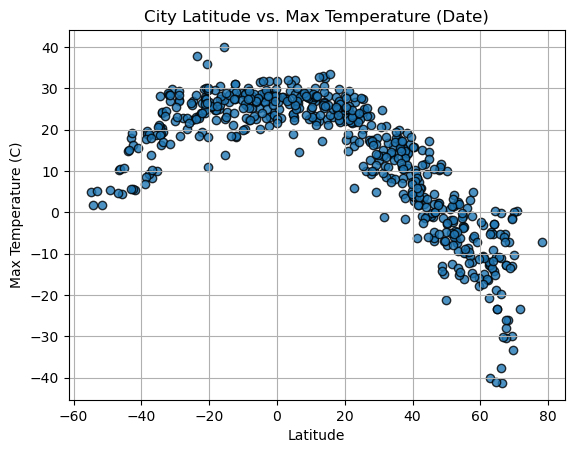

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

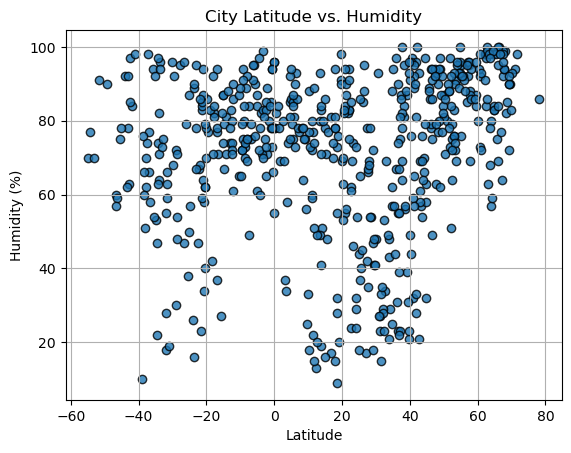

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

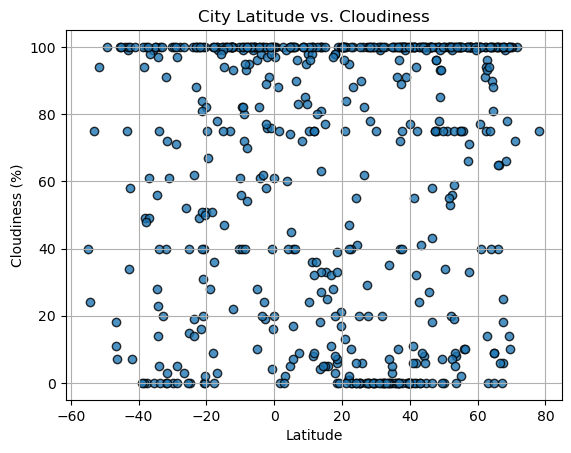

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

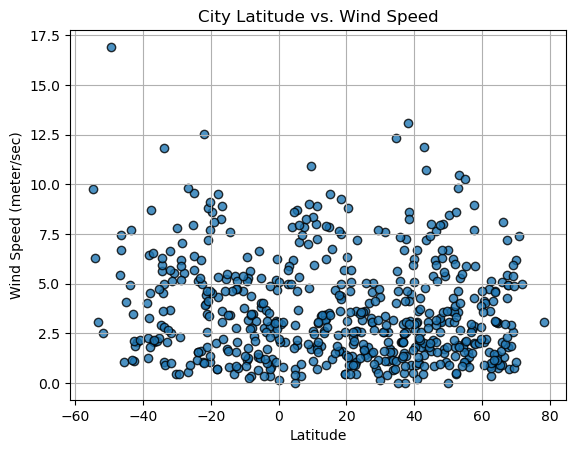

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Create a regression line
    regress_values = x_values * slope + intercept

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", marker="o", alpha=0.8)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label="y={:.2f}x+{:.2f}".format(slope, intercept))
    
     # Annotate with the correlation coefficient (r-value)
    plt.annotate(f"r = {r_value:.2f}", (min(x_values), max(y_values)), fontsize=12, color='blue')

    # Label plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,tiksi,71.6872,128.8694,-23.44,98,100,4.99,RU,1701586513,-296.59
2,tynda,55.1667,124.7167,-16.22,95,100,1.07,RU,1701586515,-289.37
3,colonia,50.9333,6.9500,0.87,80,75,3.60,DE,1701586296,-272.28
4,ribeira grande,38.5167,-28.7000,15.02,56,100,8.58,PT,1701586517,-258.13
5,tazovsky,67.4667,78.7000,-28.06,92,6,5.42,RU,1701586518,-301.21


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
1,margaret river,-33.9500,115.0667,20.34,64,5,5.00,AU,1701586514,-252.81
9,waitangi,-43.9535,-176.5597,14.90,92,100,4.92,NZ,1701586523,-258.25
10,port-aux-francais,-49.3500,70.2167,5.47,90,100,16.91,TF,1701586524,-267.68
11,grytviken,-54.2811,-36.5092,1.81,77,24,6.30,GS,1701586525,-271.34
12,blackmans bay,-43.0167,147.3167,18.07,78,99,3.46,AU,1701586526,-255.08


###  Temperature vs. Latitude Linear Regression Plot

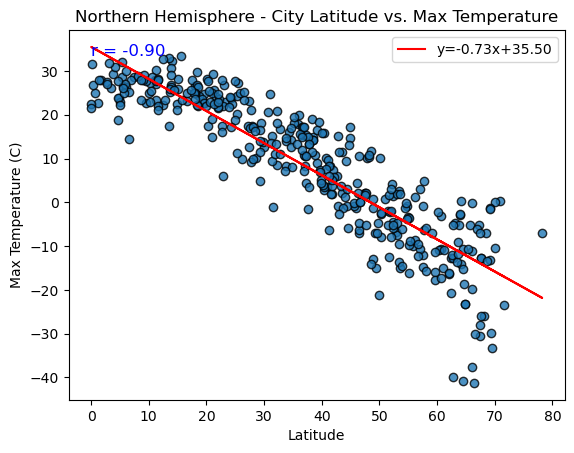

In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Northern Hemisphere - City Latitude vs. Max Temperature")

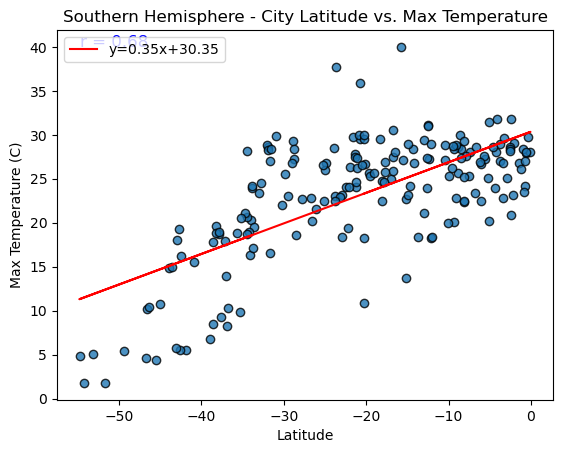

In [32]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Southern Hemisphere - City Latitude vs. Max Temperature")

**Discussion about the linear relationship:** For the Northern Hemisphere, the linear regression line (and r value) seem to be a strong negative (r = -0.90), which indicates that in the Northern Hemisphere the higher the latitude (the closer to the North Pole), the lower the tempreture gets.  
For the Southern Hemisphere, although the linear regression line isn't as strong as the Nothern one, there is still a moderate positive correlation (r = 0.68). As the latitude rises (closer to the equater), the tempreture also rises. 

### Humidity vs. Latitude Linear Regression Plot

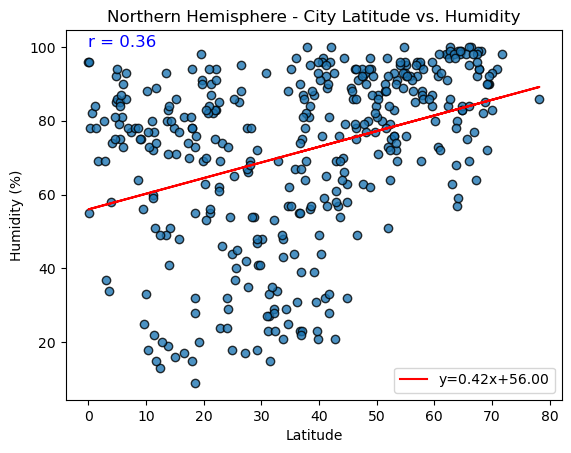

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - City Latitude vs. Humidity")

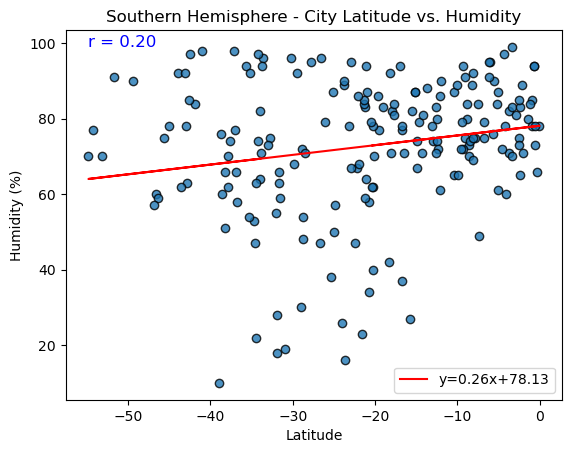

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - City Latitude vs. Humidity")


**Discussion about the linear relationship:** As both the linear regression line and the r value for both Northern and Southern Hemisphere for humidity vs latitude show, there isn't that much of a correlation. It doesn't seem like latitude has that much of an effect on humidity in this dataset. 

### Cloudiness vs. Latitude Linear Regression Plot

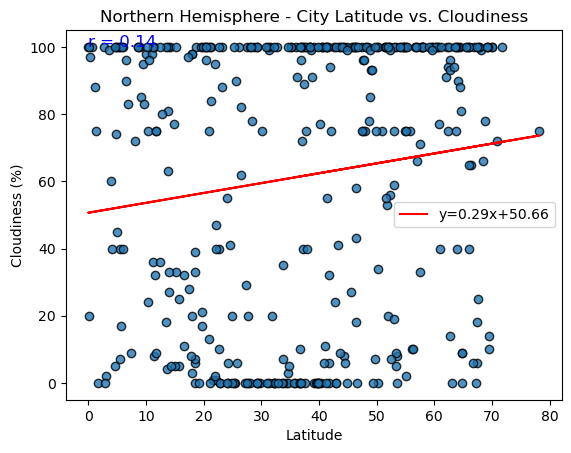

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - City Latitude vs. Cloudiness")

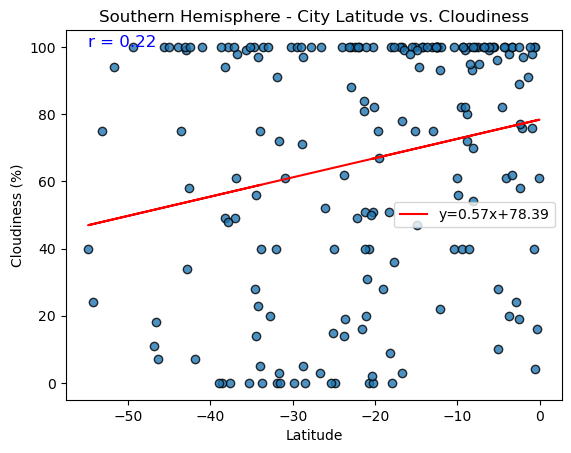

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - City Latitude vs. Cloudiness")


**Discussion about the linear relationship:** Same as humidity, there doesn't seem to be any correlation between cloudiness and latitude in both Northern and Southern Hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

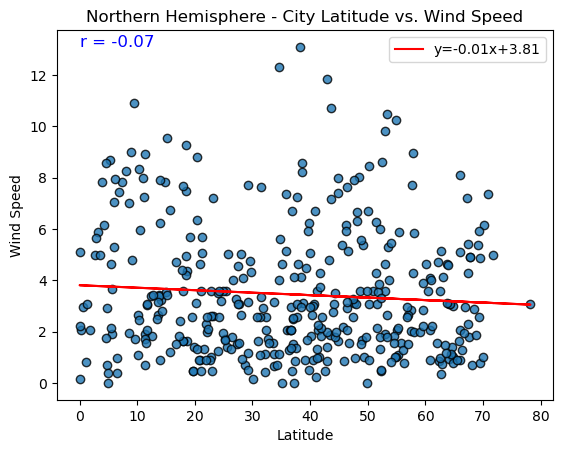

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - City Latitude vs. Wind Speed")

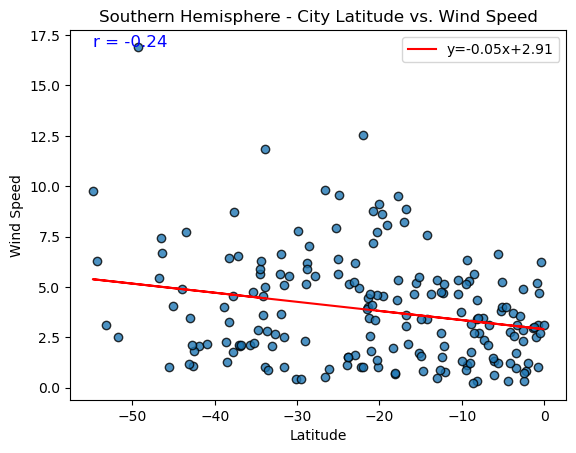

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere - City Latitude vs. Wind Speed")

**Discussion about the linear relationship:** There does seem to be a weak negative correlation between wind speed and latitude in the Southern Hemisphere that may show lower wind speed in higher altitudes. However as the r value is -0.24, it's not that strong of a correlation. 
For the Norhtern Hemisphere there is even less correlation. It doesn't seem that latitude might have much effect on wind speed. 